## Calculate MPJPE for Quantitative Comparison between 2D sequences

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def jpe(predicted, target):
    """
    per-joint position error
    """
    assert predicted.shape == target.shape
    return np.linalg.norm(predicted - target, axis=len(target.shape) - 1)

In [3]:
def cal_mean_err(data_2d, data_2d_gt):
    concat_jpe_sequence = np.empty(shape=[0, 17])

    # assuming the estimated one is stored in data_2d and ground truth in data_2d_gt
    for subject in data_2d_gt:
        for action in data_2d_gt[subject]:
            for camera_index in range(4):
                estimated_sequence = data_2d[subject][action][camera_index]
                groundtruth_sequence = data_2d_gt[subject][action][camera_index]

                # slice the estimated sequence so that estimated sequence shape = ground truth sequence shape
                n_frame = groundtruth_sequence.shape[0]
                sliced_estimated_sequence = estimated_sequence[0:n_frame]

                # calculate per-joint position error sequences based on the estimated sequence
                jpe_sequence = jpe(sliced_estimated_sequence, groundtruth_sequence) # output shape (n_frame, 17)

                # concatenate per-joint position error sequences
                concat_jpe_sequence = np.concatenate((concat_jpe_sequence, jpe_sequence), axis = 0) 

    # calculate per-joint position mean error
    # shape of concat_jpe_sequence should be (2103096, 17)
    mean_err = np.mean(concat_jpe_sequence, axis=0)
    
    return mean_err

In [4]:
# define npz file paths
npz_paths = ["data/data_2d_h36m_gt.npz", "data/data_2d_h36m_cpn_ft_h36m_dbb.npz", "data/data_2d_h36m_pct.npz", 
             "data/data_2d_h36m_vitpose.npz", "data/data_2d_h36m_moganet.npz", 
             "data/data_2d_h36m_detectron_ft_h36m.npz", "data/data_2d_h36m_transpose.npz"]

# load all npz files
data_2d_gt, data_2d_cpn, data_2d_pct, data_2d_vitpose, data_2d_moganet, data_2d_detectron, data_2d_transpose \
= [np.load(path, allow_pickle=True)['positions_2d'].item() for path in npz_paths]

In [5]:
mean_err_cpn = cal_mean_err(data_2d_cpn, data_2d_gt)
mean_err_pct = cal_mean_err(data_2d_pct, data_2d_gt)
mean_err_moganet = cal_mean_err(data_2d_moganet, data_2d_gt)
mean_err_detectron = cal_mean_err(data_2d_detectron, data_2d_gt)
mean_err_transpose = cal_mean_err(data_2d_transpose, data_2d_gt)
mean_err_vitpose = cal_mean_err(data_2d_vitpose, data_2d_gt)

In [6]:
mean_err_cpn

array([3.03482036, 4.62855923, 4.73198367, 4.62854881, 5.08291466,
       4.6986284 , 4.89968164, 3.92321726, 4.00400057, 3.22031303,
       2.43587438, 3.75430026, 6.47894322, 6.77263758, 3.65005694,
       6.20255415, 7.2087161 ])

In [7]:
mean_err_detectron

array([ 3.99327633,  5.21030959,  5.80187061,  7.13726533,  5.59313683,
        6.78962173,  7.6194824 ,  4.65441336,  4.28879937,  3.75094301,
        2.91589442,  4.56540997,  6.87951271, 10.35620223,  4.56926702,
        6.89106775, 10.94761985])

In [8]:
mean_err_pct

array([13.47893138, 16.72109385,  9.16357858,  8.84194398, 13.38316711,
        8.21634035, 10.06588543, 13.21633302, 14.28943843, 13.05556254,
       17.15737394,  5.90842132,  6.67402217,  8.28979102,  6.61447746,
        7.06667339,  8.70222074])

In [9]:
mean_err_moganet

array([14.15377715, 17.17309009,  9.69600657,  9.11807132, 14.02887152,
        8.54498457,  9.88440688, 13.53786463, 14.53195594, 12.21678651,
       18.45035285,  6.16359643,  7.09508861,  9.06782017,  6.91909955,
        7.63045876,  9.43708081])

In [10]:
mean_err_transpose

array([17.4802059 , 21.40125932, 17.94711999, 23.15847183, 18.98868662,
       19.64378592, 24.38172709, 16.92403252, 21.49697997, 18.54622398,
       25.28286029, 16.3868914 , 22.5476355 , 27.68258172, 17.34639374,
       23.06298639, 28.36765905])

In [11]:
mean_err_vitpose

array([13.32338187, 16.40387358,  9.23887045,  8.47928046, 13.18001454,
        8.19783394,  9.56738316, 13.12123882, 14.36793129, 12.03667824,
       18.01968477,  5.89415452,  6.58725324,  8.02775903,  6.6341448 ,
        7.04460817,  8.55684617])

## Plotting

In [12]:
# remove 0-bottom torso, 7-center torso, 9-neck base for a better visualization experience
mean_err_pct_plotting = np.delete(mean_err_pct, [0, 7, 9])
mean_err_moganet_plotting = np.delete(mean_err_moganet, [0, 7, 9])
mean_err_transpose_plotting = np.delete(mean_err_transpose, [0, 7, 9])
mean_err_vitpose_plotting = np.delete(mean_err_vitpose, [0, 7, 9])

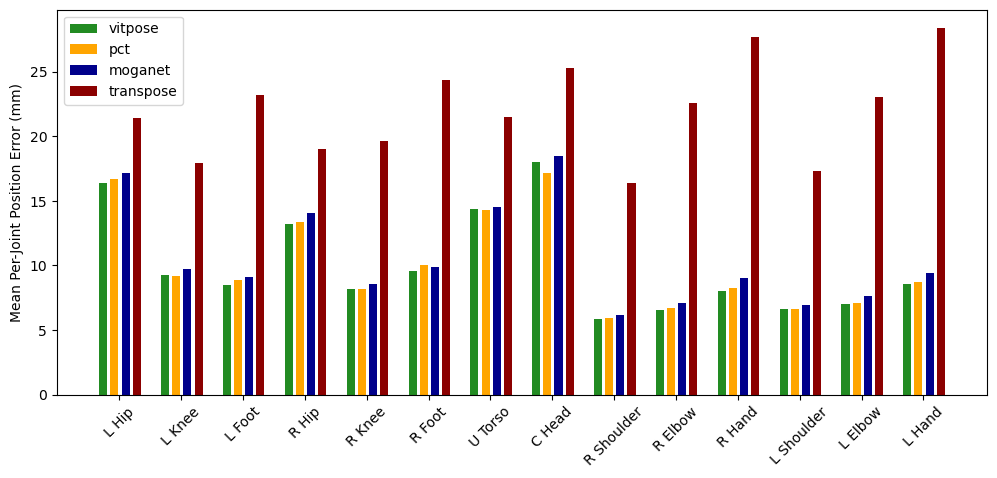

In [13]:
num_pairs = 14 # Number of pairs
bar_width = 0.13 # Width of a bar
position = np.arange(num_pairs) # Position of bars on x-axis
plt.figure(figsize=(12,5)) 

# Define bars, labels and titles
plt.bar(position, mean_err_vitpose_plotting, bar_width, color='forestgreen', label='vitpose')
plt.bar(position + bar_width + 0.05, mean_err_pct_plotting, bar_width, color='orange', label='pct')
plt.bar(position + 2 * bar_width + 0.1, mean_err_moganet_plotting, bar_width, color='darkblue', label='moganet')
plt.bar(position + 3 * bar_width + 0.15, mean_err_transpose_plotting, bar_width, color='darkred', label='transpose')
plt.ylabel('Mean Per-Joint Position Error (mm)')

# Define a list of positions at which ticks should be placed and 
# a list of labels to place at the given locations
labels = ('L Hip', 'L Knee', 'L Foot', 'R Hip', 'R Knee', 'R Foot', 'U Torso', 'C Head', 
          'R Shoulder', 'R Elbow', 'R Hand', 'L Shoulder', 'L Elbow', 'L Hand')
plt.xticks(position + 2 * bar_width, labels, rotation=45)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.savefig("figs/mpjpe_2d_unfinetuned.png")

In [14]:
# remove 0-bottom torso, 7-center torso, 9-neck base
mean_err_cpn_plotting = np.delete(mean_err_cpn, [0, 7, 9])
mean_err_detectron_plotting = np.delete(mean_err_detectron, [0, 7, 9])

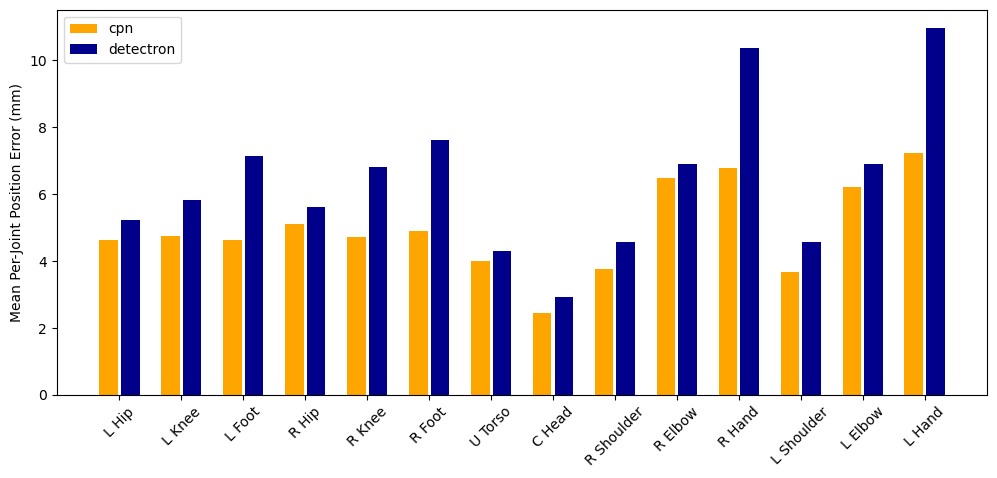

In [15]:
num_pairs = 14 # Number of pairs
bar_width = 0.3 # Width of a bar
position = np.arange(num_pairs) # Position of bars on x-axis
plt.figure(figsize=(12,5)) 

# Define bars, labels and titles
plt.bar(position, mean_err_cpn_plotting, bar_width, color='orange', label='cpn')
plt.bar(position + bar_width + 0.05, mean_err_detectron_plotting, bar_width, color='darkblue', label='detectron')
plt.ylabel('Mean Per-Joint Position Error (mm)')

# Define a list of positions at which ticks should be placed and 
# a list of labels to place at the given locations
labels = ('L Hip', 'L Knee', 'L Foot', 'R Hip', 'R Knee', 'R Foot', 'U Torso', 'C Head', 
          'R Shoulder', 'R Elbow', 'R Hand', 'L Shoulder', 'L Elbow', 'L Hand')
plt.xticks(position + bar_width/2 + 0.025, labels, rotation=45)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.savefig("figs/mpjpe_2d_finetuned.png")